<a href="https://colab.research.google.com/github/asir928/IDS/blob/main/HW4/problem1_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Asir Nayeef

# **Project 4 - Problem 1 (Python)**

1. Importing the data and converting it


In [2]:
# import pandas
import pandas as pd

# convert to dataframe
adult_training = pd.read_csv("adult_training.csv")

# summarize the datafrome
adult_training.describe()


,age,education,capital-gain,capital-loss
count,14797.000000,14797.000000,14797.000000,14797.000000
mean,38.687437,10.068798,1066.581604,88.580793
std,13.678875,2.598297,7255.455373,406.322208
min,17.000000,1.000000,0.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000
75%,48.000000,12.000000,0.000000,0.000000
max,90.000000,16.000000,99999.000000,4356.000000


In [3]:
# print first 10 rows
adult_training.head(10)

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K
5,40,Private,11,Married-civ-spouse,Craft-repair,Male,0,0,>50K
6,38,Private,7,Married-civ-spouse,Sales,Male,0,0,<=50K
7,43,Private,7,Married-civ-spouse,Transport-moving,Male,0,2042,<=50K
8,54,?,10,Married-civ-spouse,?,Male,0,0,>50K
9,39,Private,9,Divorced,Exec-managerial,Male,0,0,<=50K


2. Making and plotting a contingency table for workclass vs. sex

sex               Female  Male
workclass                     
?                    377   452
Federal-gov          149   305
Local-gov            377   592
Never-worked           1     4
Private             3574  6707
Self-emp-inc          54   444
Self-emp-not-inc     178   992
State-gov            201   385
Without-pay            1     4


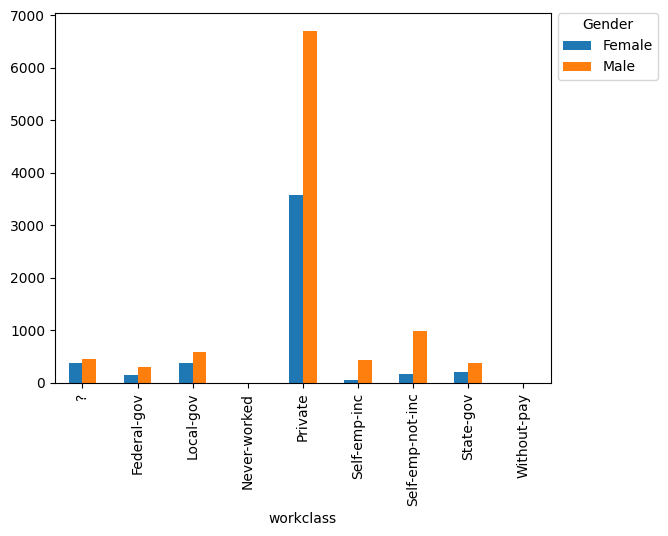

In [4]:
import matplotlib.pyplot as plt

# make contingency table
ctable1 = pd.crosstab(adult_training.workclass, adult_training.sex, margins=False)

# show contingency table
print(ctable1)

# plot the table
ax1 = ctable1.plot(kind="bar", stacked=False)
ax1.legend(title='Gender', bbox_to_anchor=(1, 1.02), loc='upper left')



3. Making and plotting a contingency table for sex vs. martial status

sex                    Female  Male
marital-status                     
Divorced                 1219   795
Married-AF-spouse           7     4
Married-civ-spouse        761  6010
Married-spouse-absent      95   104
Never-married            2160  2717
Separated                 290   182
Widowed                   380    73


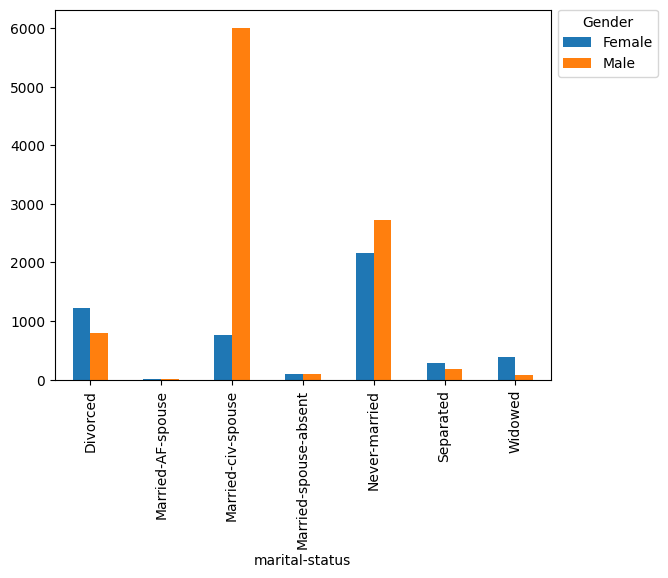

In [5]:
# make contingency table
ctable2 = pd.crosstab(adult_training['marital-status'], adult_training.sex, margins=False)

# show contingency table
print(ctable2)

# plot the table
ax2 = ctable2.plot(kind="bar", stacked=False)
ax2.legend(title='Gender', bbox_to_anchor=(1, 1.02), loc='upper left')

4. Make a dataframe with people over 40 years of age.

In [6]:
# create new dataframe with rows where age is more than 40
adultOver40 = adult_training.loc[adult_training['age'] > 40]
adultOver40.head(10)

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
7,43,Private,7,Married-civ-spouse,Transport-moving,Male,0,2042,<=50K
8,54,?,10,Married-civ-spouse,?,Male,0,0,>50K
16,44,Private,14,Divorced,Exec-managerial,Female,0,0,<=50K
19,50,Federal-gov,13,Divorced,Exec-managerial,Male,0,0,>50K
20,47,Self-emp-inc,9,Divorced,Exec-managerial,Male,0,0,<=50K
21,43,Private,10,Married-civ-spouse,Tech-support,Male,0,0,>50K
26,53,Private,9,Married-civ-spouse,Adm-clerical,Female,0,0,>50K


5. Recreate the contingency table for sex vs. martial status with the new dataframe.

sex                    Female  Male
marital-status                     
Divorced                  720   448
Married-civ-spouse        305  3383
Married-spouse-absent      38    47
Never-married             256   315
Separated                 133    74
Widowed                   354    71


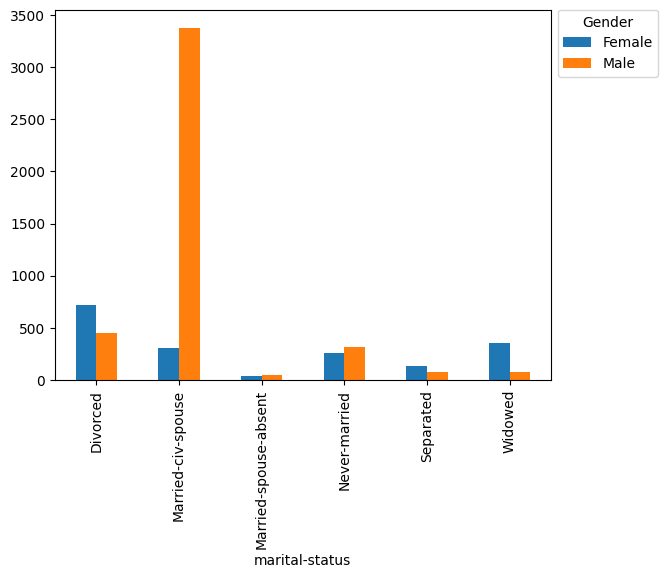

In [7]:
# make contingency table
ctable3 = pd.crosstab(adultOver40['marital-status'], adultOver40.sex, margins=False)

# show contingency table
print(ctable3)

# plot the table
ax3 = ctable3.plot(kind="bar", stacked=False)
ax3.legend(title='Gender', bbox_to_anchor=(1, 1.02), loc='upper left')

6. Identify outliers in the education field.

count    14797.000000
mean        10.068798
std          2.598297
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education, dtype: float64


<Axes: >

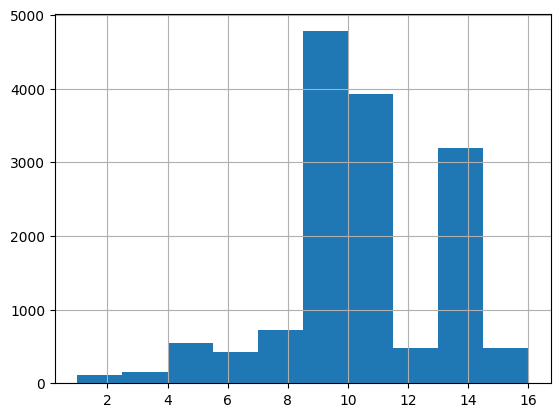

In [8]:
# summary of education column
print(adult_training['education'].describe())

# histogram
adult_training['education'].hist()

In [9]:
# import necessary tools
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# get scalers
standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

In [11]:
# import necessary tools
import matplotlib.pyplot as plt

count    1.479700e+04
mean    -1.920775e-17
std      1.000034e+00
min     -3.490403e+00
25%     -4.113594e-01
50%     -2.647890e-02
75%      7.432821e-01
max      2.282804e+00
Name: scaled_education, dtype: float64

count    1.479700e+04
mean    -1.920775e-17
std      1.000034e+00
min     -3.490403e+00
25%     -4.113594e-01
50%     -2.647890e-02
75%      7.432821e-01
max      2.282804e+00
Name: scaled_education, dtype: float64



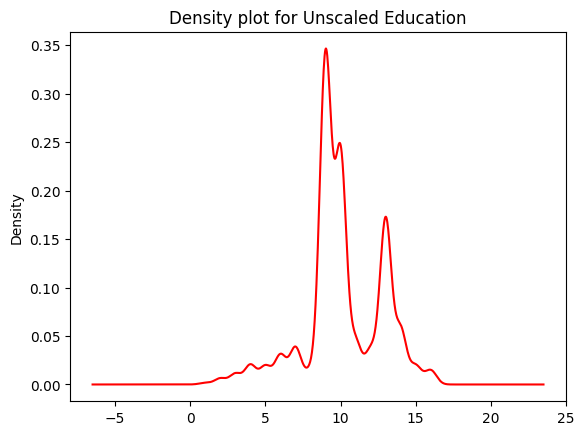

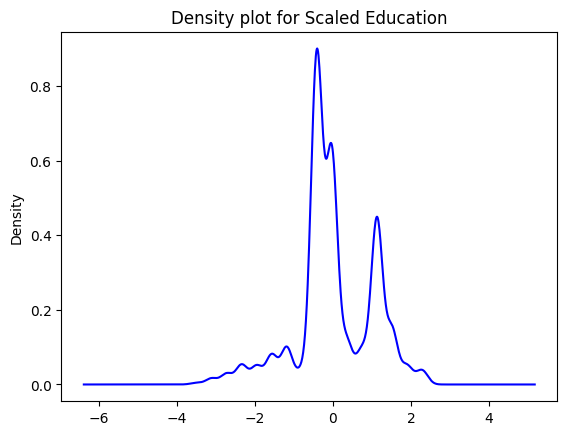

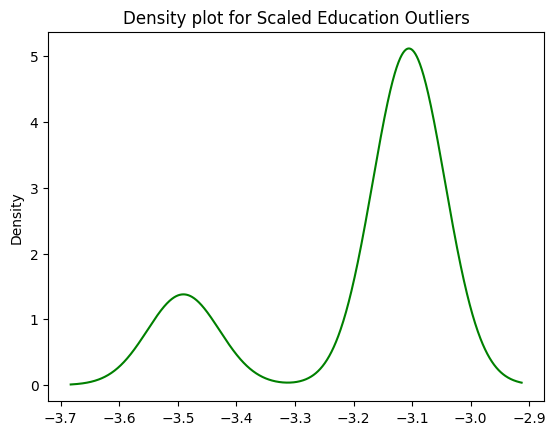

There are 113 outliers.
72      -3.105523
101     -3.490403
199     -3.105523
243     -3.105523
437     -3.105523
           ...   
14254   -3.105523
14318   -3.105523
14475   -3.105523
14551   -3.490403
14724   -3.105523
Name: scaled_education, Length: 113, dtype: float64


In [43]:
# scale education column
adult_training['scaled_education'] = standard_scaler.fit_transform(np.array(adult_training.education).reshape(-1,1))
print(adult_training['scaled_education'].describe())
print()

# query for outliers
education_outliers = adult_training.query('(scaled_education > 3 | scaled_education < -3)')['scaled_education']


#plot graphs
adult_training.education.plot.density(color="red")
plt.title('Density plot for Unscaled Education')
plt.show()

adult_training.scaled_education.plot.density(color="blue")
plt.title('Density plot for Scaled Education')
plt.show()

education_outliers.plot.density(color="green")
plt.title('Density plot for Scaled Education Outliers')
plt.show()

# get number of outliers
print("There are", len(education_outliers), "outliers.")
print(education_outliers)

The education field contains outliers (-3 to -4 values in rows)

7. Standardize age values and look for outliers.



count    14797.000000
mean        38.687437
std         13.678875
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64
Axes(0.125,0.11;0.775x0.77)


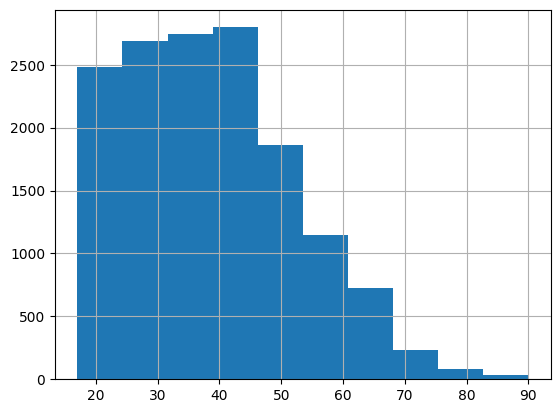

In [35]:
#summarize data
print(adult_training['age'].describe())
# historgram
print(adult_training['age'].hist())

count    1.479700e+04
mean     9.651895e-17
std      1.000034e+00
min     -1.585523e+00
25%     -7.813360e-01
50%     -1.233649e-01
75%      6.808219e-01
max      3.751354e+00
Name: scaled_age, dtype: float64



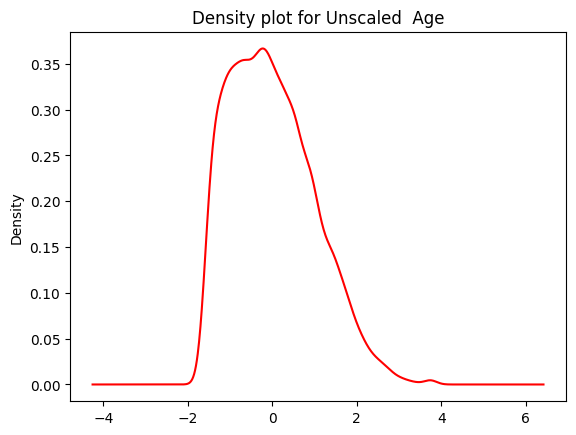

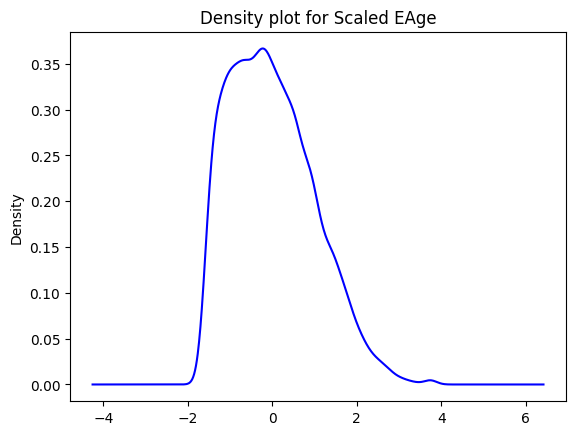

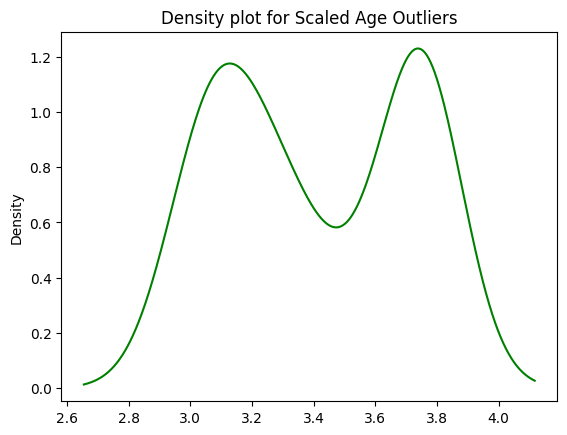

there are 60 outliers
outliers:
99       3.751354
204      3.020275
492      3.751354
552      3.605138
885      3.751354
1066     3.751354
1485     3.166491
2420     3.751354
2430     3.020275
2467     3.751354
2877     3.751354
3453     3.239598
3868     3.385814
3891     3.166491
4008     3.020275
4114     3.751354
4643     3.020275
4680     3.751354
5154     3.312706
5481     3.751354
5936     3.751354
5961     3.312706
6450     3.020275
6476     3.751354
7147     3.312706
7254     3.751354
7651     3.093383
7724     3.020275
8346     3.020275
8405     3.751354
8477     3.020275
8608     3.751354
8768     3.239598
8773     3.166491
8785     3.751354
8921     3.751354
9369     3.166491
9397     3.385814
9561     3.093383
9857     3.093383
10158    3.751354
10282    3.166491
10468    3.605138
10470    3.312706
10991    3.458922
11091    3.751354
11108    3.166491
11234    3.093383
11562    3.751354
11604    3.020275
12656    3.312706
12948    3.751354
13455    3.093383
14091    3.751

In [42]:
# make column for outliers
adult_training['scaled_age'] = standard_scaler.fit_transform(np.array(adult_training.age).reshape(-1,1))

# summarize
print(adult_training['scaled_age'].describe())
print()

# query
age_outliers = adult_training.query('(scaled_age > 3 | scaled_age < -3)')['scaled_age']

#plot graphs
adult_training.scaled_age.plot.density(color="red")
plt.title('Density plot for Unscaled  Age')
plt.show()

adult_training.scaled_age.plot.density(color="blue")
plt.title('Density plot for Scaled EAge')
plt.show()

age_outliers.plot.density(color="green")
plt.title('Density plot for Scaled Age Outliers')
plt.show()

#get outliers
age_outliers = adult_training.query('(scaled_age > 3 | scaled_age < -3)')['scaled_age']
print("there are", len(age_outliers), "outliers")

print("outliers:")
print(age_outliers)

There are 60 outliers with the most extreme being 3.751354

      age         workclass  education      marital-status       occupation  \
99     90           Private          9       Never-married    Other-service   
204    80                 ?          9             Widowed                ?   
492    90           Private          9       Never-married    Other-service   
552    88  Self-emp-not-inc         15  Married-civ-spouse   Prof-specialty   
885    90           Private         13  Married-civ-spouse  Exec-managerial   
1066   90           Private         10       Never-married    Other-service   
1485   82                 ?          4             Widowed                ?   
2420   90           Private          5       Never-married     Adm-clerical   
2430   80           Private         14             Widowed   Prof-specialty   
2467   90         Local-gov         14  Married-civ-spouse  Exec-managerial   

         sex  capital-gain  capital-loss income  scaled_education  
99      Male             0          2206  <=50K         -0.411

<Axes: >

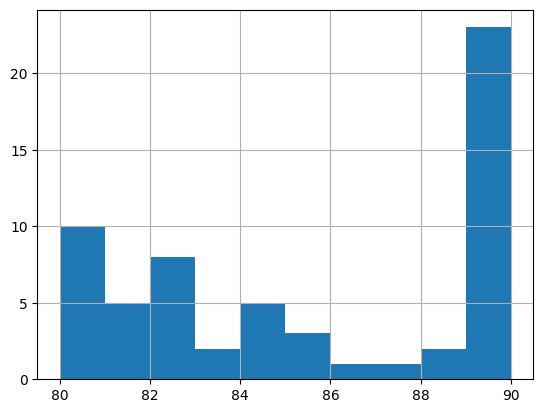

In [17]:
#make new dataframe
adultOver80 = adult_training.loc[adult_training['age'] >= 80]

#print table and histogram
print(adultOver80.head(10))
adultOver80['age'].hist()

There is more density near the 90 area than the 80 area

## Summary

* The data for the histogram regarding age is skewed more to the right.
* There are more males than females in the workclass vs sex contingency table.
* Married-civ-spouse had the most people in the sex vs. marital status table.
* There are 113 outliers in terms of education and 60 in terms of age.

